# PyBEL Demo

This demo shows the ease of downloading a sample BEL file by URL and parsing it with `PyBEL`. 

In [6]:
import os
import logging
import json
import time
import math
from collections import Counter
from operator import itemgetter

import pandas as pd
import pybel
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

'Run on {} with PyBEL Version {}'.format(time.asctime(), pybel.__version__)

'Run on Sun Oct 23 23:24:37 2016 with PyBEL Version 0.2.1-dev'

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("requests").setLevel(logging.WARNING)

# Small Corpus

The example small corpus is distributed by Selventa and the OpenBEL Consortium and has "approximately 2000 hand curated statements drawn from 57 PubMeds"

In [14]:
url = 'http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel'
pickle_path = os.path.expanduser('~/.pybel/bel/small_corpus.gpickle')

rerun = True
if os.path.exists(pickle_path) and not rerun:
    g_small = pybel.from_pickle(pickle_path)
else:
    g_small = pybel.from_url(url)
    pybel.to_pickle(g_small, pickle_path)

INFO:pybel:Loading from url: http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel
INFO:pybel:File length: 3596 lines
INFO:pybel:Loading namespace cache from sqlite:////Users/cthoyt/.pybel/data/namespace_cache.db
INFO:pybel:Initiation of namespace cache took 0.00s
INFO:pybel:Finished parsing document section in 0.00 seconds
ERROR:pybel:Line 0000015 - general failure: DEFINE NAMESPACE SDIS AS URL "http://resource.belframework.org/belframework/1.0/namespace/selventa-legacy-diseases.belns" - <class 'KeyError'>: 'http://resource.belframework.org/belframework/1.0/namespace/selventa-legacy-diseases.belns'
ERROR:pybel:Line 0000016 - general failure: DEFINE NAMESPACE PFR AS URL "http://resource.belframework.org/belframework/1.0/namespace/selventa-named-rat-protein-families.belns" - <class 'KeyError'>: 'http://resource.belframework.org/belframework/1.0/namespace/selventa-named-rat-protein-families.belns'
ERROR:pybel:Line 0000017 - general failure: DEFINE NAMESPACE MGI AS 

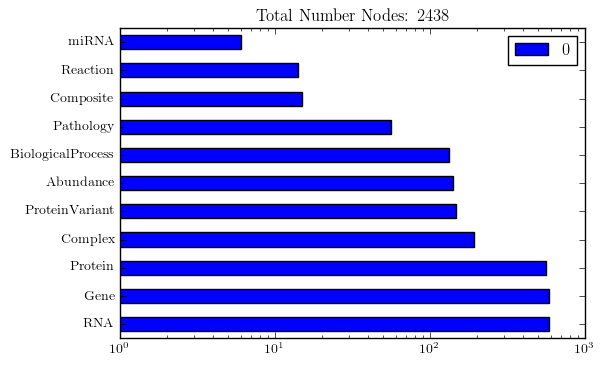

In [9]:
c = Counter(map(itemgetter(0), filter(lambda x: x, g_small)))
df = pd.DataFrame.from_dict(c, orient='index')
df.sort_values(0, ascending=False).plot(kind='barh', logx=True)
plt.title('Total Number Nodes: {}'.format(g_small.number_of_nodes()))
plt.show()

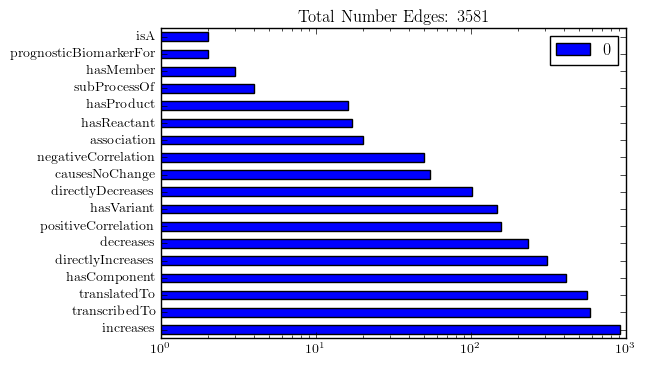

In [10]:
ec = Counter(data['relation'] for _, _, data in g_small.edges(data=True) if 'relation' in data)
df_ec = pd.DataFrame.from_dict(ec, orient='index')
df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True)
plt.title('Total Number Edges: {}'.format(g_small.number_of_edges()))
plt.show()

CPU times: user 33.1 s, sys: 106 ms, total: 33.2 s
Wall time: 33.2 s


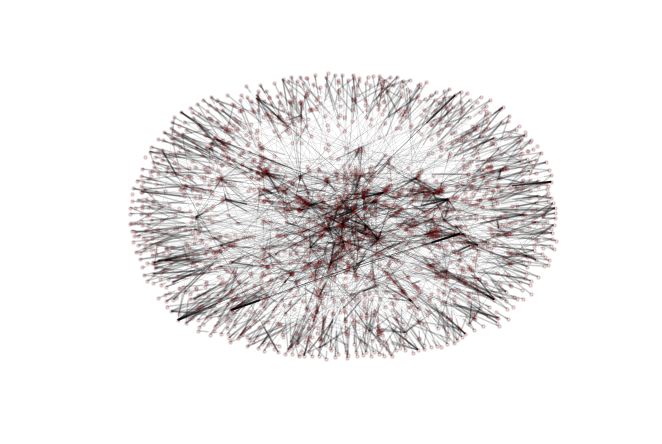

In [8]:
%%time
nx.draw_spring(g_small, 
               k=2.5/math.sqrt(len(g_small)),
               iterations=100,
               node_size=5, 
               width=0.3,  
               alpha=0.15)

# Large Corpus

In [11]:
url = 'http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel'
pickle_path = os.path.expanduser('~/.pybel/bel/large_corpus.gpickle')

rerun = False
if os.path.exists(pickle_path) and not rerun:
    g_large = pybel.from_pickle(pickle_path)
else:
    g_large = pybel.from_url(url)
    pybel.to_pickle(g_large, pickle_path)

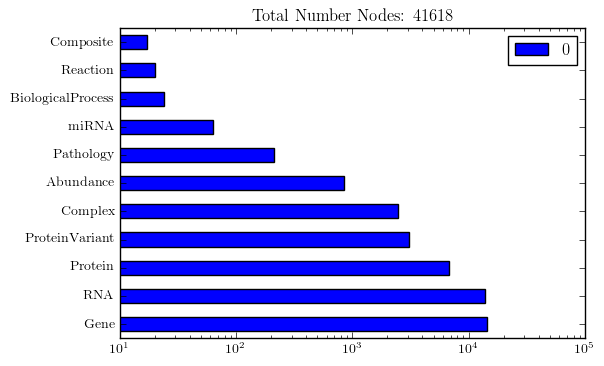

In [12]:
c = Counter(map(itemgetter(0), filter(lambda x: x, g_large)))
df = pd.DataFrame.from_dict(c, orient='index')
df.sort_values(0, ascending=False).plot(kind='barh', logx=True)
plt.title('Total Number Nodes: {}'.format(g_large.number_of_nodes()))
plt.show()

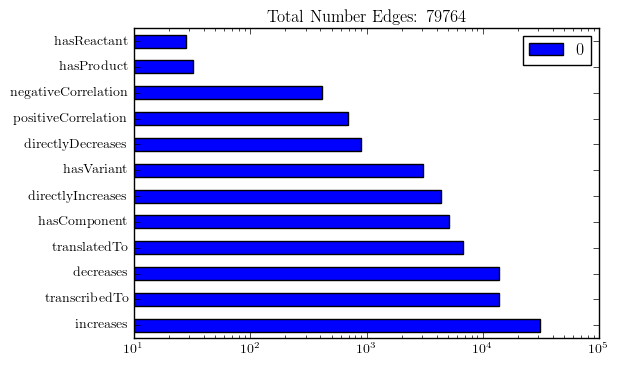

In [13]:
ec = Counter(data['relation'] for _, _, data in g_large.edges(data=True) if 'relation' in data)
df_ec = pd.DataFrame.from_dict(ec, orient='index')
df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True)
plt.title('Total Number Edges: {}'.format(g_large.number_of_edges()))
plt.show()